In [1]:
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import os

# Use of 3MdB database : https://sites.google.com/site/mexicanmillionmodels/

## Connect the MySQL database

In [2]:
co = pymysql.connect(host=os.environ['MdB_HOST'], 
                     db=os.environ['MdB_DB_17'], 
                     user=os.environ['MdB_USER'], 
                     passwd=os.environ['MdB_PASSWD'])
res = pd.read_sql("""
SELECT log10(N__2_658345A/H__1_656281A) AS n2, 
log10(O__3_500684A/H__1_486133A) AS o3, 
THp as T,
OXYGEN AS O,
logU_mean as logU,
substring(com3, 6) as age,
Hbfrac,
substring(com5, 5) as NO
FROM tab_17 WHERE ref = 'BOND'""", 
                  con=co)
co.close()

In [3]:
print(len(res))

113420


## Some colums are strings, transform into float

In [4]:
res['age'] = res['age'].astype(float)
res['NO'] = res['NO'].astype(float)

## Classical PBT diagram

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


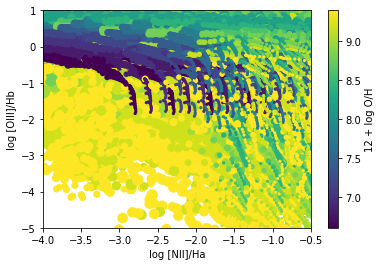

In [5]:
f, ax = plt.subplots()
sc = ax.scatter(res['n2'], res['o3'], c=12+res['O'], s=150+40*res['logU'], edgecolor='')
ax.set_xlabel("log [NII]/Ha")
ax.set_ylabel("log [OIII]/Hb")
ax.set_xlim((-4, -0.5))
ax.set_ylim((-5, 1))
cb = f.colorbar(sc, ax=ax)
cb.set_label("12 + log O/H")

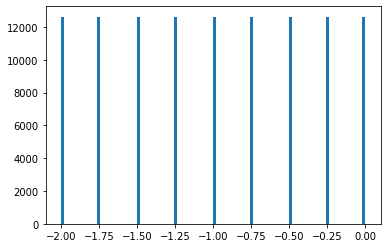

In [6]:
plt.hist(res['NO'], bins=100);

In [7]:
mask_NO = (np.abs(res['NO'] + 1.0) < 0.1)
mask_RB = res['Hbfrac'] > 0.95
print(mask_NO.sum(), mask_RB.sum())
mask = mask_NO & mask_RB
print(mask.sum())

12600 11342
1260


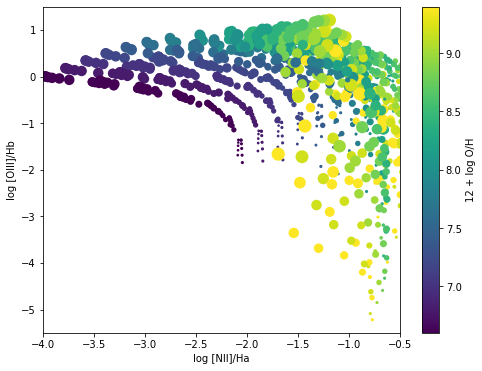

In [8]:
res2 = res[mask]
f, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(res2['n2'], res2['o3'], c=12+res2['O'], s=150+40*res2['logU'], edgecolor='')
ax.set_xlabel("log [NII]/Ha")
ax.set_ylabel("log [OIII]/Hb")
ax.set_xlim((-4, -0.5))
ax.set_ylim((-5.5, 1.5))
cb = f.colorbar(sc, ax=ax)
cb.set_label("12 + log O/H")